In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import xgboost as xgb

In [2]:
from sklearn import preprocessing

In [3]:
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train_copy=df_train.drop('SalePrice',1)
df = df_train_copy.append(df_test)
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [9]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [10]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [11]:
month_dummies=pd.get_dummies(df['MoSold'],prefix="Mo",drop_first=True).astype(int)
df=pd.concat([df,month_dummies], axis=1)

year_dummies=pd.get_dummies(df['YrSold'],prefix='Year',drop_first=True).astype(int)
df=pd.concat([df,year_dummies], axis=1)
df=df.drop(['MoSold','YrSold'],axis=1)

In [12]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
GarageQual        159
GarageCond        159
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           2909
Fence            2348
MiscFeature      2814
MiscVal             0
SaleType            1
SaleCondit

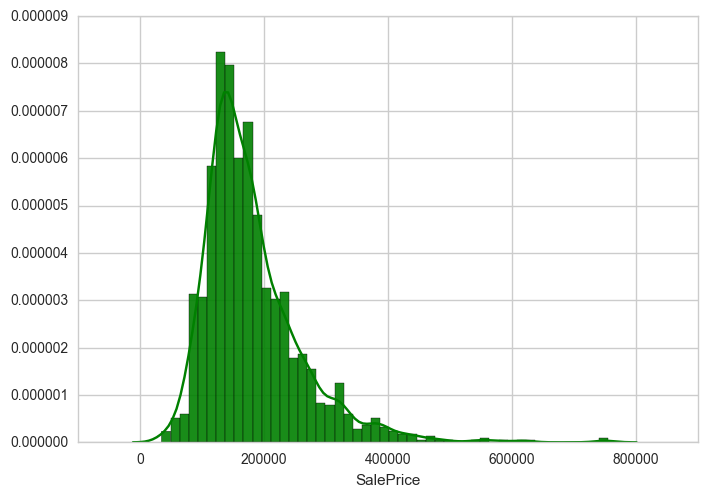

In [13]:
#House price distribution
sns.distplot(df_train['SalePrice'], kde = True, color = 'g', hist_kws={'alpha': 0.9})

In [14]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

In [15]:
# Convert MSSubClass to categorial features
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [16]:
df['Alley']=df['Alley'].replace(np.nan,'no Alley')

In [17]:
df['Alley'].unique()

array(['no Alley', 'Grvl', 'Pave'], dtype=object)

In [18]:
#Introduce some interaction:
df['interQual']=df.loc[:,'OverallQual']*df.loc[:,'OverallCond']
df['Built']=df.loc[:,'YearBuilt']*df.loc[:,'BsmtFinSF1']
df['RemodFlrSF']=df.loc[:,'YearRemodAdd']*df.loc[:,'2ndFlrSF']
df['Basement']=df.loc[:,'TotalBsmtSF']*df.loc[:,'BsmtUnfSF']
df['Ground']=df.loc[:,'GrLivArea']*df.loc[:,'YearBuilt']
df['Bath']=df.loc[:,'FullBath']*df.loc[:,'YearBuilt']
df['AboveGround']=df.loc[:,'TotRmsAbvGrd']*df.loc[:,'BedroomAbvGr']
df['livingArea']=df.loc[:,'TotalBsmtSF']*df.loc[:,'GrLivArea']
df['years']=df.loc[:,'YearBuilt']*df.loc[:,'YearRemodAdd']
df['Lot']=df.loc[:,'1stFlrSF']*df.loc[:,'LotFrontage']

In [20]:
df['totalFlrSF']=df.loc[:,'1stFlrSF']+df.loc[:,'2ndFlrSF']
df['All_Liv_Area']=df.loc[:,'1stFlrSF']+df.loc[:,'2ndFlrSF']+df.loc[:,'LowQualFinSF']+df.loc[:,'GrLivArea']
df=df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'],axis=1)

In [21]:
new_features=['interQual','Built','RemodFlrSF','Basement','Ground','Bath',
               'AboveGround','livingArea','years','Lot','totalFlrSF','All_Liv_Area']
df[new_features]=df[new_features].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 101 entries, Id to All_Liv_Area
dtypes: float64(23), int32(15), int64(19), object(44)
memory usage: 2.1+ MB


In [23]:
categorial_features = df.select_dtypes(include=[object]).columns.values

In [24]:
categorial_features,len(categorial_features)

(array(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
        'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object), 44)

In [25]:
numeric_features = df.select_dtypes(include=['float64','int64']).columns.values

In [26]:
numeric_features

array(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'interQual', 'Built', 'RemodFlrSF', 'Basement', 'Ground', 'Bath',
       'AboveGround', 'livingArea', 'years', 'Lot', 'totalFlrSF',
       'All_Liv_Area'], dtype=object)

In [27]:
df.select_dtypes(include=['int32']).columns.values

array(['Mo_2', 'Mo_3', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9',
       'Mo_10', 'Mo_11', 'Mo_12', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010'], dtype=object)

In [28]:
numeric_features=np.delete(numeric_features,0,0)

In [29]:
df[categorial_features].isnull().sum()

MSSubClass          0
MSZoning            4
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [30]:
# Replace nan values of columns having least nans, including 1 or 2
# by the most frequent value for each column.
nan_frequent = ['MSZoning', 'Utilities','Exterior1st','Exterior2nd','Electrical',
               'KitchenQual','Functional','SaleType']
for column in nan_frequent:
    df[column].fillna(df[column].value_counts().idxmax(), inplace=True)

In [31]:
df[nan_frequent].isnull().sum()

MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
Electrical     0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64

In [32]:
#These columns have similar ranking, so I decided to put them together.
ranking_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
                'KitchenQual','FireplaceQu','GarageQual','GarageCond',
                'PoolQC']

In [33]:
for col in ranking_cols:
    df[col]=df[col].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}).astype(int)

In [34]:
df[ranking_cols].isnull().sum()

ExterQual      0
ExterCond      0
BsmtQual       0
BsmtCond       0
HeatingQC      0
KitchenQual    0
FireplaceQu    0
GarageQual     0
GarageCond     0
PoolQC         0
dtype: int64

In [35]:
#I check the dictionary file to recognize the NA values in these features
# mean that feature does not exist.
nan_cat_col=['BsmtFinType1','BsmtFinType2','GarageType',
    'GarageFinish','Fence','MiscFeature','MasVnrType']
for col in nan_cat_col:
    df[col]=df[col].replace(np.nan,'None')

In [36]:
basement_type=['BsmtFinType1','BsmtFinType2']
for col in basement_type:
    df[col]=df[col].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}).astype(int)

In [37]:
df['BsmtExposure']=df['BsmtExposure'].map({np.nan:0,'No':1,'Mn':2,'Av':3,'Gd':4}).astype(int)

In [38]:
df[categorial_features].isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [39]:
new_categorial_features = df.select_dtypes(include=[object]).columns.values

In [40]:
new_categorial_features,len(new_categorial_features)

(array(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
        'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence',
        'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object), 31)

In [41]:
#Create dummy variables for categorical features.
categorial_features_dummies=pd.get_dummies(df[new_categorial_features],drop_first=True).astype(int)
df=pd.concat([df,categorial_features_dummies], axis=1)
df=df.drop(new_categorial_features,axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 252 entries, Id to SaleCondition_Partial
dtypes: float64(23), int32(210), int64(19)
memory usage: 3.3 MB


## Handle missing values for numeric features

In [43]:
nans=df[numeric_features].isnull().sum()
print nans


LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
interQual          0
Built              1
RemodFlrSF         0
Basement           1
Ground             0
Bath               0
AboveGround        0
livingArea         1
years              0
Lot              486
totalFlrSF         0
All_Liv_Area       0
dtype: int64


In [44]:
nan_numeric = nans[nans > 0].index.values

In [45]:
nan_numeric

array(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'Built', 'Basement',
       'livingArea', 'Lot'], dtype=object)

In [46]:
from scipy.stats import skew

In [47]:
skewed_features = df[numeric_features].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features = skewed_features.index

df[skewed_features] = np.log1p(df[skewed_features])


In [48]:
skewed_features

Index([u'LotFrontage', u'LotArea', u'MasVnrArea', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'BsmtHalfBath', u'KitchenAbvGr',
       u'TotRmsAbvGrd', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal', u'Built',
       u'RemodFlrSF', u'Basement', u'Ground', u'AboveGround', u'livingArea',
       u'Lot', u'totalFlrSF', u'All_Liv_Area'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC2FD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E77B6D8>]], dtype=object)

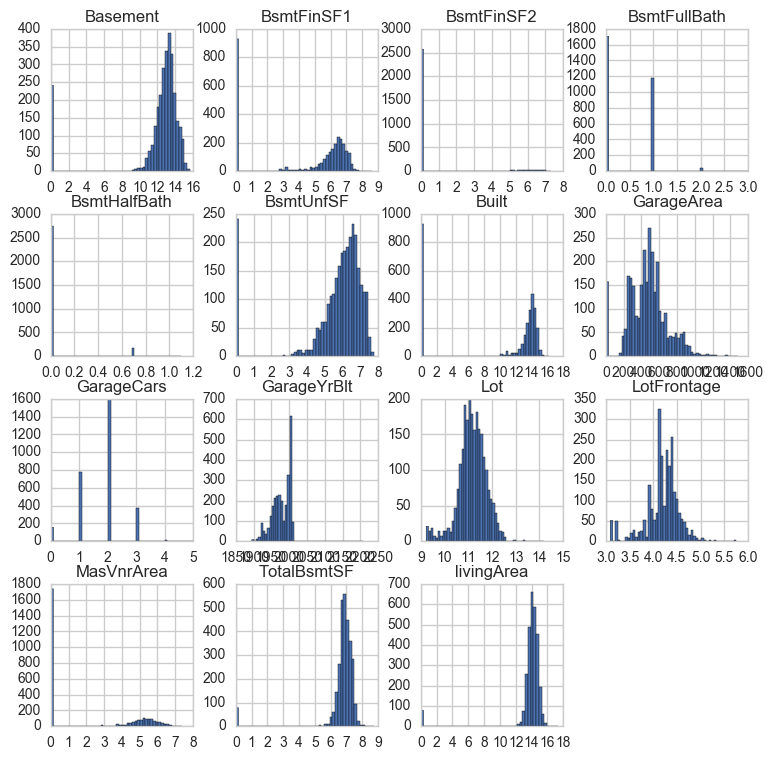

In [49]:
#Plot distributions for nan_numerical columns
df[nan_numeric].hist(bins=50, figsize=(9,9))

In [52]:
# Replace the nan values by the column's median
df[nan_numeric]=df[nan_numeric].apply(lambda x: x.fillna(x.median()),axis=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000126518D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015EADF98>]], dtype=object)

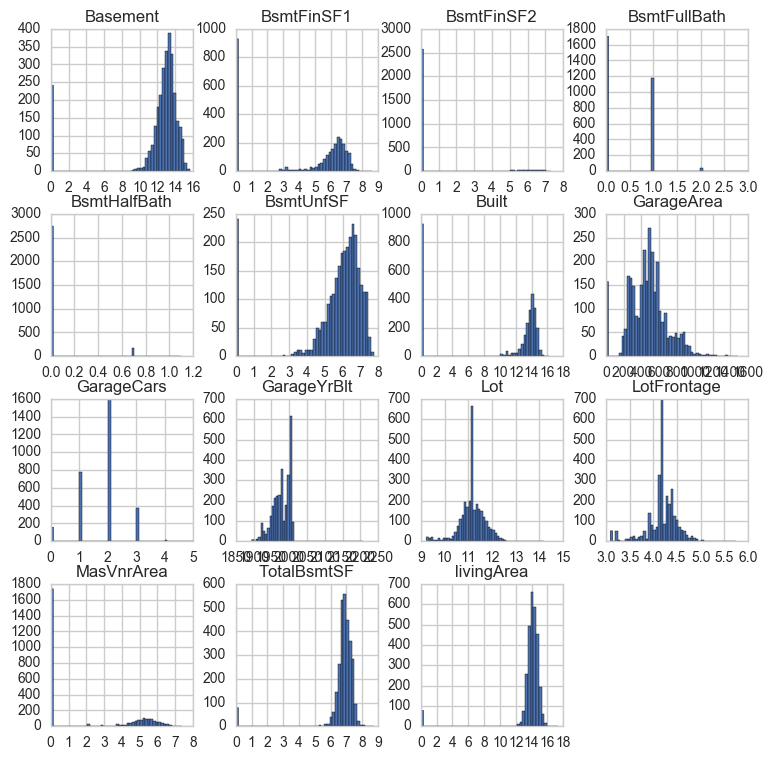

In [53]:
# Replot those columns after imputing the median values for nans.
df[nan_numeric].hist(bins=50, figsize=(9,9))

In [54]:
# correlation between features and SalePrice
corrwith = df[numeric_features].corrwith(df_train['SalePrice'])


In [55]:
corrwith.sort(inplace=True)

C:\Users\phong\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [56]:
corrwith

EnclosedPorch   -0.207263
KitchenAbvGr    -0.144278
MiscVal         -0.067054
OverallCond     -0.036868
BsmtFinSF2      -0.030361
BsmtHalfBath    -0.004890
3SsnPorch        0.058827
PoolArea         0.069949
ScreenPorch      0.105857
RemodFlrSF       0.165120
Built            0.185342
BsmtFinSF1       0.208099
BsmtUnfSF        0.208233
BedroomAbvGr     0.209043
BsmtFullBath     0.236224
Basement         0.255914
HalfBath         0.313982
WoodDeckSF       0.343039
LotFrontage      0.343820
AboveGround      0.362380
TotalBsmtSF      0.372838
livingArea       0.385284
LotArea          0.399923
MasVnrArea       0.417361
OpenPorchSF      0.459948
Fireplaces       0.489450
GarageYrBlt      0.501656
TotRmsAbvGrd     0.539998
Lot              0.540363
YearRemodAdd     0.565608
YearBuilt        0.586570
FullBath         0.594771
interQual        0.606873
Bath             0.608401
years            0.645149
GarageArea       0.650888
GarageCars       0.680625
All_Liv_Area     0.730254
totalFlrSF  

In [ ]:
#Normalize all the numeric featues by using preprocessing package
#scaler = preprocessing.StandardScaler()
#df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [57]:
#final check to see if we're having any NA value in any column
nan_df=df.isnull().sum()
nan_df=nan_df[nan_df>0].index.values
nan_df

array([], dtype=object)

In [58]:
df.set_index('Id', inplace=True)
train = df[:df_train.shape[0]]
test = df[df_train.shape[0]:]
print train.shape, test.shape

(1460, 251) (1459, 251)


In [59]:
X = train
y = df_train['SalePrice']
test=test

In [60]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor


In [62]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV

In [63]:
from sklearn.cross_validation import cross_val_score

In [64]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="mean_squared_error", cv = 5))
    return(rmse)

In [65]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge_rmse = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

In [66]:
cv_ridge_rmse

[0.13405062621510261,
 0.1325100963666391,
 0.13005669915502108,
 0.12810978414572091,
 0.1265425621578295,
 0.12599903936234219,
 0.12595640503532768,
 0.1265395727917103,
 0.12887893093423611,
 0.13165138630827572,
 0.13433971159893895]

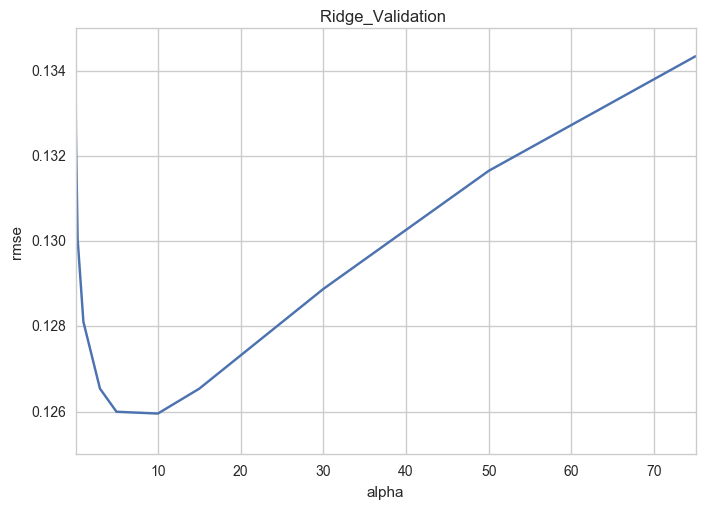

In [67]:
cv_ridge_rmse = pd.Series(cv_ridge_rmse, index = alphas)
cv_ridge_rmse.plot(title = "Ridge_Validation ")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [68]:
lasso_alphas = [0.0001,.0005,0.001,0.1,0.5,1]

In [69]:
cv_lasso_rmse = [rmse_cv(Lasso(alpha = alpha,max_iter=30000)).mean() for alpha in lasso_alphas]

C:\Users\phong\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [70]:
cv_lasso_rmse

[0.12464423922727633,
 0.12359161569541263,
 0.12443064010317786,
 0.19492790415985031,
 0.21878733205298176,
 0.24186829773170765]

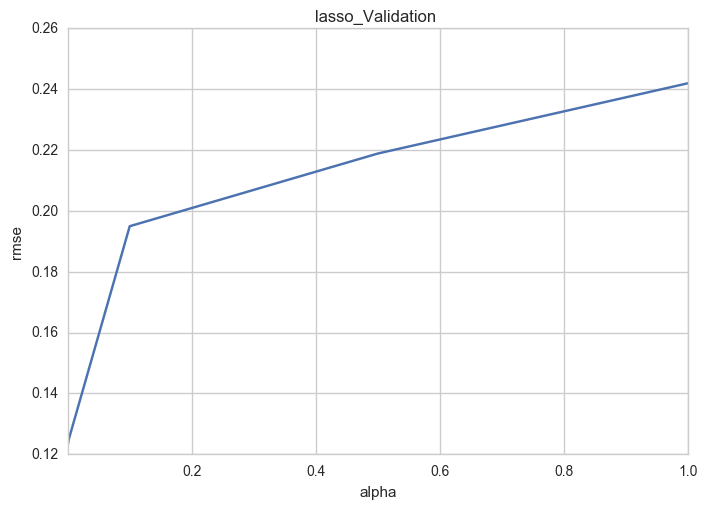

In [71]:
cv_lasso_rmse = pd.Series(cv_lasso_rmse, index = lasso_alphas)
cv_lasso_rmse.plot(title = "lasso_Validation ")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [72]:
ElasticNet_alphas = [0.0001,.0005,0.001,0.1,0.5,1]
cv_ElasticNet_rmse = [rmse_cv(ElasticNet(alpha = alpha,max_iter=10000)).mean() for alpha in ElasticNet_alphas]

In [73]:
cv_ElasticNet_rmse

[0.12691698207268259,
 0.12372555148809439,
 0.12355618190576331,
 0.18462947689848533,
 0.20880052438223107,
 0.21892188157219028]

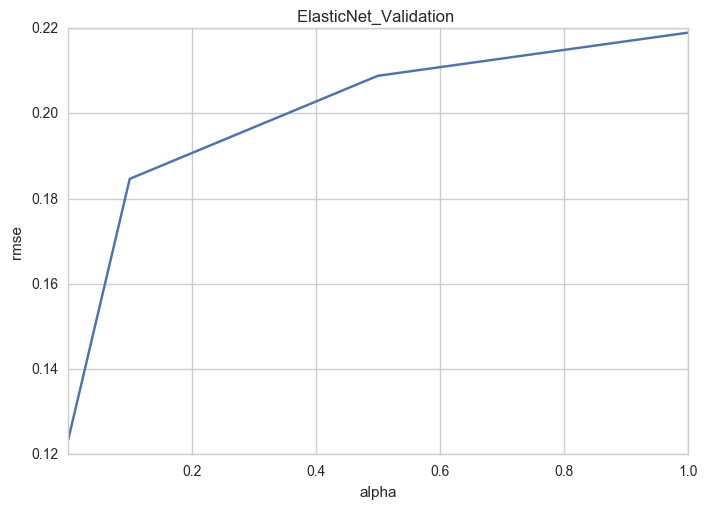

In [74]:
cv_ElasticNet_rmse = pd.Series(cv_ElasticNet_rmse, index = ElasticNet_alphas)
cv_ElasticNet_rmse.plot(title = "ElasticNet_Validation ")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [75]:
min(cv_ridge_rmse ),min(cv_lasso_rmse),min(cv_ElasticNet_rmse)

(0.12595640503532768, 0.12359161569541263, 0.12355618190576331)

In [ ]:
#1 0.12736644313698381, 0.1244949463772022, 0.12482864716346606)
#2 (0.12638569471017749, 0.12366180282949446, 0.12368196898847914)

In [76]:
# check whether any duplicate in column names
from collections import Counter
mylist = list(X_train)
[k for k,v in Counter(mylist).items() if v>1]

[]

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [ ]:
n_estimators = [100,150, 170 , 200, 400, 500,600]
cv_rmse_gb = [rmse_cv(GradientBoostingRegressor(n_estimators = n_estimator)).mean() 
            for n_estimator in n_estimators]

In [ ]:
cv_rmse_gb

In [ ]:
rf_n_estimators= [100,250,500,600,700,1000 ]
         #'max_features': [ 'auto','sqrt', 'log2'],
         #'min_samples_split':[10,20,30,50,70,100]}

In [ ]:
cv_rmse_rf =[rmse_cv(RandomForestRegressor(n_jobs=-1,random_state=0,oob_score=True
                    ,n_estimators = n_estimator)).mean()for n_estimator in rf_n_estimators]

In [ ]:
cv_rmse_rf

In [ ]:
#model = XGBRegressor()  # and for classifier  


In [ ]:
#model.fit(X_train, y_train)

In [ ]:
#predictions=model.predict(X_test)

In [ ]:
#scores=-cross_val_score(model,X_train, y_train,cv=5, scoring='mean_squared_error')
#print scores.mean()

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(test)
params = {"max_depth":6, "eta":0.1}
xgb_model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [ ]:
xgb_model["test-rmse-mean"].idxmin(),xgb_model["test-rmse-mean"].min()

In [ ]:
xgb_model.loc[100:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [ ]:
#from scipy import stats
#from sklearn.grid_search import RandomizedSearchCV

In [ ]:
'''
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
'''

In [ ]:
#clf = RandomizedSearchCV(model, param_distributions = param_dist, n_iter = 25, scoring = 'mean_squared_error', error_score = 0, verbose = 3, n_jobs = -1)

In [ ]:
#clf.fit(X_train,y_train)

#print('Best score: {}'.format(-(clf.best_score_)))
#print('Best parameters: {}'.format(clf.best_params_))

In [ ]:
'''
Define the model to run:lasso,ridge, elasticnet, xgboost, etc
Define the parameters to run
Define randomizesearch
Select criteria to output
'''

In [78]:
ridgereg = Ridge(alpha=10)
ridgereg.fit(X,y)
ridge_y_pred = np.expm1(ridgereg.predict(test))


In [79]:
lassoreg = Lasso(alpha=.0005)
lassoreg.fit(X,y)
laso_y_pred = np.expm1(lassoreg.predict(test))

In [80]:
elasticnetreg = ElasticNet(alpha=.001)
elasticnetreg.fit(X,y)
elasticnet_y_pred = np.expm1(elasticnetreg.predict(test))

In [ ]:
#xgbregressor_y_pred=np.expm1(clf.best_estimator_.predict(test))

In [ ]:
predictions = pd.DataFrame({'ridge':ridge_y_pred, "lasso":laso_y_pred ,'elasticNet':elasticnet_y_pred})

In [81]:
preds = .25*ridge_y_pred+.5*laso_y_pred+.25*elasticnet_y_pred

In [ ]:
#solution = pd.DataFrame({"Id":df_test['Id'], "SalePrice":preds})
#solution.to_csv("first_sol.csv", index = False)

In [82]:
solution = pd.DataFrame({"Id":df_test['Id'], "SalePrice":preds})
solution.to_csv("013_sol.csv", index = False)

In [ ]:
#solution = pd.DataFrame({"Id":df_test['Id'], "SalePrice":preds})
#solution.to_csv("00_sol.csv", index = False)